<a href="https://colab.research.google.com/github/chrlles/vacinaxpopulacao/blob/main/Vacina_x_Popu%C3%A7%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Aplicação de Vacina por País

- passo 1: Importar as bibliotecas
- passo 2: Olhar as informações da tabela
- passo 3: Fazer um ranking dos Países que mais vacinaram a sua pupulação e o tipo das vacinas mais ultilizadas


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
dados = pd.read_csv('/content/drive/MyDrive/vaccination-data(26-08-2021).csv')
dados.head()

,COUNTRY,ISO3,WHO_REGION,DATA_SOURCE,DATE_UPDATED,TOTAL_VACCINATIONS,PERSONS_VACCINATED_1PLUS_DOSE,TOTAL_VACCINATIONS_PER100,PERSONS_VACCINATED_1PLUS_DOSE_PER100,PERSONS_FULLY_VACCINATED,PERSONS_FULLY_VACCINATED_PER100,VACCINES_USED,FIRST_VACCINE_DATE,NUMBER_VACCINES_TYPES_USED
0,Afghanistan,AFG,EMRO,REPORTING,2021-08-20,1201286.0,770542.0,3.086,1.979,430744.0,1.107,"Beijing CNBG - BBIBP-CorV,Janssen - Ad26.COV 2...",2021-02-22,4.0
1,Albania,ALB,EURO,OWID,2021-08-17,1340339.0,764997.0,46.575,26.583,575342.0,19.992,"AstraZeneca - AZD1222, Pfizer BioNTech - Comir...",NaN,4.0
2,Algeria,DZA,AFRO,REPORTING,2021-08-23,4146091.0,3421279.0,9.455,7.802,724812.0,1.653,"Beijing CNBG - BBIBP-CorV,Gamaleya - Sputnik V...",2021-01-30,3.0
3,American Samoa,ASM,WPRO,REPORTING,2021-08-09,52769.0,29210.0,95.601,52.920,24104.0,43.669,"Janssen - Ad26.COV 2.5,Moderna - mRNA-1273,Pfi...",2020-12-21,3.0
4,Andorra,AND,EURO,OWID,2021-08-15,91660.0,51044.0,118.631,66.064,40616.0,52.567,"AstraZeneca - AZD1222, Pfizer BioNTech - Comir...",NaN,2.0


In [ ]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 14 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   COUNTRY                               227 non-null    object 
 1   ISO3                                  227 non-null    object 
 2   WHO_REGION                            227 non-null    object 
 3   DATA_SOURCE                           227 non-null    object 
 4   DATE_UPDATED                          227 non-null    object 
 5   TOTAL_VACCINATIONS                    226 non-null    float64
 6   PERSONS_VACCINATED_1PLUS_DOSE         218 non-null    float64
 7   TOTAL_VACCINATIONS_PER100             226 non-null    float64
 8   PERSONS_VACCINATED_1PLUS_DOSE_PER100  218 non-null    float64
 9   PERSONS_FULLY_VACCINATED              216 non-null    float64
 10  PERSONS_FULLY_VACCINATED_PER100       216 non-null    float64
 11  VACCINES_USED      

In [ ]:
dados.dropna(inplace=True)

In [ ]:
dados.describe()

,TOTAL_VACCINATIONS,PERSONS_VACCINATED_1PLUS_DOSE,TOTAL_VACCINATIONS_PER100,PERSONS_VACCINATED_1PLUS_DOSE_PER100,PERSONS_FULLY_VACCINATED,PERSONS_FULLY_VACCINATED_PER100,NUMBER_VACCINES_TYPES_USED
count,1.470000e+02,1.470000e+02,147.000000,147.000000,1.470000e+02,147.000000,147.000000
mean,1.339598e+07,8.970842e+06,49.813816,29.080272,4.577740e+06,21.069027,3.299320
std,5.752762e+07,4.127112e+07,47.432885,25.274433,1.848004e+07,22.725356,1.866852
min,7.300000e+01,3.700000e+01,0.078000,0.067000,3.600000e+01,0.007000,1.000000
25%,9.622050e+04,6.954800e+04,6.260000,4.049000,2.779300e+04,1.900000,2.000000
50%,5.037070e+05,3.541920e+05,36.413000,24.056000,1.786060e+05,11.978000,3.000000
75%,4.056552e+06,2.636434e+06,82.151000,52.777000,1.438392e+06,33.206000,4.500000
max,5.606520e+08,4.357201e+08,151.605000,85.518000,1.701386e+08,74.845000,9.000000


In [ ]:
dados.COUNTRY.unique()

array(['Afghanistan', 'Algeria', 'American Samoa', 'Angola', 'Anguilla',
       'Antigua and Barbuda', 'Argentina', 'Aruba', 'Australia',
       'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia (Plurinational State of)',
       'Bonaire, Sint Eustatius and Saba', 'Botswana', 'Brazil',
       'British Virgin Islands', 'Brunei Darussalam', 'Burkina Faso',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada', 'Cayman Islands',
       'Central African Republic', 'Chad', 'Chile', 'Colombia', 'Comoros',
       'Congo', 'Cook Islands', 'Costa Rica', 'Côte d’Ivoire', 'Curaçao',
       'Democratic Republic of the Congo', 'Djibouti', 'Dominica',
       'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador',
       'Equatorial Guinea', 'Eswatini', 'Ethiopia', 'Fiji',
       'French Polynesia', 'Gabon', 'Gambia', 'Ghana', 'Grenada',
       'Guadeloupe', 'Guam', 'Guatemala', 'Guinea', 'Guinea-Bissau',
       'Guyana', 'Honduras', 'India', 'In

In [ ]:
# tipo de Vacinas Usadas em cada País
dados.VACCINES_USED.unique()

array(['Beijing CNBG - BBIBP-CorV,Janssen - Ad26.COV 2.5,Pfizer BioNTech - Comirnaty,SII - Covishield',
       'Beijing CNBG - BBIBP-CorV,Gamaleya - Sputnik V,SII - Covishield',
       'Janssen - Ad26.COV 2.5,Moderna - mRNA-1273,Pfizer BioNTech - Comirnaty',
       'SII - Covishield', 'AstraZeneca - Vaxzevria',
       'AstraZeneca - Vaxzevria,Beijing CNBG - BBIBP-CorV,Gamaleya - Sputnik V,Pfizer BioNTech - Comirnaty,SII - Covishield',
       'AstraZeneca - Vaxzevria,Beijing CNBG - BBIBP-CorV,Gamaleya - Sputnik V,Moderna - mRNA-1273,SII - Covishield',
       'Janssen - Ad26.COV 2.5,Pfizer BioNTech - Comirnaty',
       'AstraZeneca - Vaxzevria,Novavax - Covavax,Pfizer BioNTech - Comirnaty',
       'AstraZeneca - Vaxzevria,Pfizer BioNTech - Comirnaty,SII - Covishield',
       'AstraZeneca - Vaxzevria,Beijing CNBG - BBIBP-CorV,Gamaleya - Sputnik V,Janssen - Ad26.COV 2.5,Moderna - mRNA-1273,Pfizer BioNTech - Comirnaty,SII - Covishield',
       'AstraZeneca - Vaxzevria,Beijing CNBG - BBIBP-C

In [ ]:
dados.WHO_REGION.unique()

array(['EMRO', 'AFRO', 'WPRO', 'AMRO', 'SEARO', 'EURO'], dtype=object)

In [ ]:
# minimo de vacinação por Região
dados.groupby('WHO_REGION').TOTAL_VACCINATIONS.min()

WHO_REGION
AFRO        31090.0
AMRO         2828.0
EMRO        33709.0
EURO     88037283.0
SEARO      491569.0
WPRO           73.0
Name: TOTAL_VACCINATIONS, dtype: float64

In [ ]:
dados.groupby(['COUNTRY']).TOTAL_VACCINATIONS.agg([len, min, max])

,len,min,max
COUNTRY,,,
Afghanistan,1.0,1201286.0,1201286.0
Algeria,1.0,4146091.0,4146091.0
American Samoa,1.0,52769.0,52769.0
Angola,1.0,1754073.0,1754073.0
Anguilla,1.0,18458.0,18458.0
...,...,...,...
Wallis and Futuna,1.0,9276.0,9276.0
Yemen,1.0,311483.0,311483.0
Zambia,1.0,503707.0,503707.0


In [ ]:
dados.groupby(['COUNTRY', 'TOTAL_VACCINATIONS']).mean()

,,PERSONS_VACCINATED_1PLUS_DOSE,TOTAL_VACCINATIONS_PER100,PERSONS_VACCINATED_1PLUS_DOSE_PER100,PERSONS_FULLY_VACCINATED,PERSONS_FULLY_VACCINATED_PER100,NUMBER_VACCINES_TYPES_USED
COUNTRY,TOTAL_VACCINATIONS,,,,,,
Afghanistan,1201286.0,770542.0,3.086,1.979,430744.0,1.107,4.0
Algeria,4146091.0,3421279.0,9.455,7.802,724812.0,1.653,3.0
American Samoa,52769.0,29210.0,95.601,52.920,24104.0,43.669,3.0
Angola,1754073.0,1025762.0,5.337,3.121,728311.0,2.216,1.0
Anguilla,18458.0,9493.0,123.037,63.278,8965.0,59.759,1.0
...,...,...,...,...,...,...,...
Wallis and Futuna,9276.0,4674.0,82.483,41.561,4602.0,40.921,1.0
Yemen,311483.0,298161.0,1.044,1.000,13322.0,0.045,1.0
Zambia,503707.0,303966.0,2.740,1.653,199741.0,1.086,1.0


In [ ]:
# total vacina por Região
total_vacina = dados[['WHO_REGION', 'TOTAL_VACCINATIONS']].groupby(['WHO_REGION']).sum()
total_vacina

,TOTAL_VACCINATIONS
WHO_REGION,
AFRO,44819090.0
AMRO,758089152.0
EMRO,169461726.0
EURO,88037283.0
SEARO,720946143.0
WPRO,187856347.0


In [ ]:
vacina = dados[['COUNTRY', 'TOTAL_VACCINATIONS']].groupby('COUNTRY').sum()

In [ ]:
# raking dos 10 países que mais vacianaram pessoas, destaque para India
raking = vacina.sort_values(by=['TOTAL_VACCINATIONS'])[-10:]
raking

,TOTAL_VACCINATIONS
COUNTRY,
Saudi Arabia,34352022.0
Argentina,38145435.0
Pakistan,50478166.0
Canada,52163987.0
Japan,84009438.0
Indonesia,84293970.0
The United Kingdom,88037283.0
Brazil,165960369.0
United States of America,361192198.0


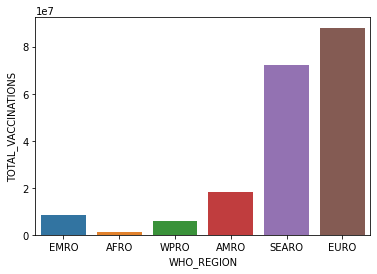

In [ ]:
# análise por gráfico das regiões que aplicaram a vacina, Europa foi  a Região que mais vacinou pessoas
sns.barplot(data=dados, x='WHO_REGION', y='TOTAL_VACCINATIONS', ci=False)

In [ ]:
top_10 = dados[['COUNTRY', 'TOTAL_VACCINATIONS']].sort_values('TOTAL_VACCINATIONS')[-10:]


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


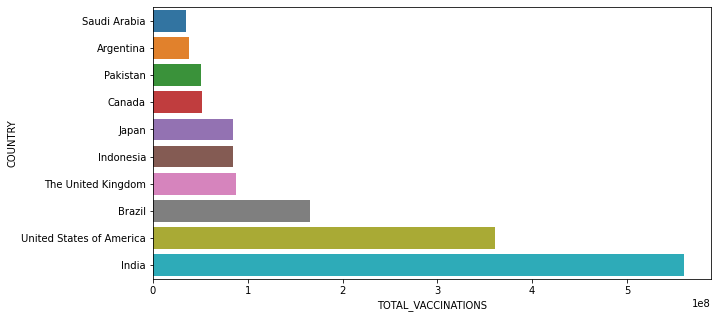

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(top_10.TOTAL_VACCINATIONS, top_10.COUNTRY)

In [ ]:
tipo_vacina = dados[['VACCINES_USED', 'TOTAL_VACCINATIONS']].sort_values('TOTAL_VACCINATIONS')[-20:]

In [ ]:
tipo_vacina.reset_index()

,index,VACCINES_USED,TOTAL_VACCINATIONS
0,159,"AstraZeneca - Vaxzevria,Beijing CNBG - BBIBP-C...",16640907.0
1,194,"AstraZeneca - Vaxzevria,Beijing CNBG - BBIBP-C...",16920027.0
2,95,"AstraZeneca - Vaxzevria,Beijing CNBG - BBIBP-C...",19894523.0
3,16,"AstraZeneca - Vaxzevria,Beijing CNBG - BBIBP-C...",21728150.0
4,122,"AstraZeneca - Vaxzevria,CanSino - Ad5-nCOV,Gam...",23161255.0
5,201,"AstraZeneca - Vaxzevria,Beijing CNBG - BBIBP-C...",23599154.0
6,41,"AstraZeneca - Vaxzevria,CanSino - Ad5-nCOV,Pfi...",26500341.0
7,166,"AstraZeneca - Vaxzevria,Janssen - Ad26.COV 2.5...",27527266.0
8,136,"AstraZeneca - Vaxzevria,Beijing CNBG - BBIBP-C...",30199776.0
9,43,"AstraZeneca - Vaxzevria,Janssen - Ad26.COV 2.5...",32741710.0
